In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
edge_info = pd.read_pickle('../data/preprocessed/edge_info.pkl')
node_info = pd.read_pickle('../data/preprocessed/node_info.pkl')

In [5]:
len(node_info), len(edge_info)

(124733, 2620473)

In [6]:
node_info[node_info['super_class'] == 'central']

,root_id,name,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,length_nm,area_nm,size_nm
46,720575940602090976,SIP_R.FLA_L.1,SIP_R.FLA_L,ACH,0.92,0.04,0.00,0.01,0.03,0.92,...,NaN,NaN,NaN,NaN,DL1_ventral,right,NaN,1388704,3682184832,216011714560
47,720575940602120928,AVLP_R.AVLP_R.1,AVLP_R.AVLP_R,ACH,0.77,0.10,0.03,0.01,0.08,0.77,...,NaN,NaN,NaN,NaN,VLPa1_medial,right,NaN,1816877,4096610176,218489722880
51,720575940602313952,GNG.GNG.1,GNG.GNG,GLUT,0.58,0.01,0.01,0.28,0.58,0.11,...,NaN,NaN,NaN,NaN,LB3,left,NaN,318535,958501760,53967298560
54,720575940602380768,AVLP_R.AMMC_R.1,AVLP_R.AMMC_R,GABA,0.65,0.04,0.03,0.65,0.18,0.10,...,NaN,NaN,NaN,NaN,WEDa1,right,NaN,1144114,4442342016,309903452160
58,720575940602415584,WED_L.WED_L.1,WED_L.WED_L,GABA,0.72,0.02,0.00,0.72,0.05,0.21,...,NaN,NaN,NaN,WED032,WEDa2,left,NaN,721657,1678626176,115126466560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124571,720575940660313729,GNG.SLP_R.28,GNG.SLP_R,ACH,0.95,0.03,0.00,0.01,0.01,0.95,...,NaN,NaN,NaN,NaN,ALl1_ventral,right,NaN,1755438,5538599936,364797030400
124572,720575940660314241,WED_R.AMMC_R.11,WED_R.AMMC_R,GABA,0.64,0.05,0.02,0.64,0.18,0.10,...,NaN,NaN,NaN,NaN,WEDa1,right,NaN,1338423,5134454784,353499811840
124671,720575940660634497,EB.EB.351,EB.EB,GABA,0.96,0.01,0.00,0.96,0.01,0.02,...,CX,ring neuron,NaN,ER4m,EBa1,left,NaN,1247887,7817908480,789220085760
124691,720575940660742785,SPS_L.SAD.13,SPS_L.SAD,ACH,0.85,0.07,0.00,0.02,0.04,0.85,...,NaN,NaN,NaN,NaN,NaN,left,NaN,2800876,12862283648,1499490017280


In [7]:
node_info.sample(10)

,root_id,name,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,length_nm,area_nm,size_nm
9246,720575940610831058,SMP_R.LAL_R.2,SMP_R.LAL_R,ACH,0.89,0.05,0.00,0.01,0.03,0.89,...,NaN,NaN,NaN,SMP013,AOTUv3_dorsal,right,NaN,2364187,7267329536,541854494720
4617,720575940607539122,LO_R.LO_R.85,LO_R.LO_R,GLUT,0.58,0.05,0.02,0.17,0.58,0.15,...,optic_lobes,NaN,NaN,NaN,NaN,right,NaN,833268,2016773504,103039528960
117725,720575940641258448,ME_L.ME_L.17590,ME_L.ME_L,GLUT,0.40,0.01,0.00,0.29,0.40,0.13,...,optic_lobes,NaN,NaN,NaN,NaN,left,NaN,199125,897792896,76685045760
37254,720575940619704478,ME_L.ME_L.5552,ME_L.ME_L,GABA,0.57,0.01,0.00,0.57,0.29,0.09,...,optic_lobes,NaN,NaN,NaN,NaN,left,NaN,1411250,4068040192,257566269440
2092,720575940605610673,LOP_L.LOP_L.23,LOP_L.LOP_L,GLUT,0.63,0.04,0.01,0.23,0.63,0.08,...,optic_lobes,NaN,NaN,NaN,NaN,left,NaN,537253,1449461120,77920327680
7866,720575940610046532,ME_L.ME_L.1137,ME_L.ME_L,GLUT,0.58,0.04,0.01,0.30,0.58,0.07,...,optic_lobes,NaN,NaN,NaN,NaN,left,NaN,161913,460196096,16712744960
8129,720575940610230738,PVLP_L.PVLP_L.13,PVLP_L.PVLP_L,ACH,0.76,0.11,0.02,0.03,0.08,0.76,...,NaN,NaN,NaN,LC9,NaN,left,NaN,875721,3016449024,192937031680
11758,720575940611917977,ME_L.ME_L.1679,ME_L.ME_L,ACH,0.61,0.02,0.01,0.25,0.09,0.61,...,L1-5,NaN,L4,NaN,NaN,left,NaN,190754,821718144,81247109120
7822,720575940610014674,ME_L.LO_L.448,ME_L.LO_L,ACH,0.84,0.01,0.00,0.07,0.02,0.84,...,optic_lobes,NaN,NaN,NaN,NaN,left,NaN,209011,677343232,62049566720
84806,720575940629264378,ME_L.LO_L.5190,ME_L.LO_L,ACH,0.87,0.03,0.00,0.01,0.01,0.87,...,optic_lobes,NaN,NaN,NaN,NaN,left,NaN,262816,525352704,33061068800


In [8]:
from collections import Counter

hl_counter = Counter(node_info['hemilineage'][~node_info['hemilineage'].isna()])
hl_sorted = sorted(hl_counter, key=lambda x: x[1], reverse=True)

In [9]:
hl_counter[hl_sorted[100]]

210

In [10]:
list(hl_sorted)

['MX7',
 'MX12',
 'MX3',
 'MX0',
 'MX7__prim',
 'MX12__prim',
 'PSp2',
 'PSp3',
 'PSa1',
 'PSp1',
 'CREa2_ventral',
 'TRdl_a',
 'TRdl_b',
 'TRdm',
 'CREa1_ventral',
 'CREa2_medial',
 'CREa1_dorsal',
 'CREl1',
 'VPNp&v1_posterior',
 'VPNp1_lateral',
 'VPNp1_medial',
 'VPNd1',
 'VPNl&d1_dorsal',
 'VPNl&d1_lateral',
 'VPNp&v1_ventral',
 'AOTUv4_dorsal',
 'AOTUv3_ventral',
 'AOTUv4_ventral',
 'AOTUv1_ventral',
 'AOTUv3_dorsal',
 'AOTUv2',
 'AOTUv1_medial',
 'DM4_ventral',
 'DM2_central',
 'DM2_CX_p',
 'DM4_CX_v',
 'DM3_CX_v',
 'DM4_CX_d2',
 'DM3_CX_p',
 'DM3_CX_d2',
 'SMPpm1',
 'DM1_CX_p',
 'DM1_antero_ventral',
 'SMPad2',
 'DM2_CX_v',
 'DM4_dorsal',
 'DM6_dorso_medial',
 'DM6_dorso_lateral',
 'DM6_central1',
 'DM4_CX_p',
 'DM5_ventral',
 'DM6_ventral',
 'SMPpv1',
 'DM3_dorso_lateral',
 'DM2_CX_d2',
 'DM3_posterior',
 'DM4_CX_d1',
 'DM3_CX_d1',
 'DM2_CX_d1',
 'SMPp&v1_posterior',
 'SMPp&v1_ventral',
 'DM1_CX_d2',
 'SMPad3',
 'SMPad1',
 'DM1_dorsal',
 'DM1_CX_v',
 'DM6_posterior',
 'SMPpd1'

Exclude optic neurons


In [11]:
node_info = node_info[node_info["super_class"] != "optic"]
edge_info = edge_info[
    edge_info["pre_root_id"].isin(node_info["root_id"])
    & edge_info["post_root_id"].isin(node_info["root_id"])
]

In [12]:
print(f"|V|={len(node_info)}, |E|={len(edge_info)}")

|V|=51405, |E|=1301936


## EXPLORATION  

A. Node and Edge Statistics (see exploitation.ipynb)

B. Degree Distribution

C. Other Properties of the Graph

D. Node Clustering

### B. Degree Distribution

In [13]:
# build the adjacency matrix

import numpy as np

# Create a list of unique node IDs
node_ids = np.unique(np.concatenate([edge_info['pre_root_id'], edge_info['post_root_id']]))

# Create an empty adjacency matrix filled with zeros
adjacency_matrix = np.zeros((len(node_ids), len(node_ids)))

# Map node IDs to indices
node_indices = {node_id: index for index, node_id in enumerate(node_ids)}

# Iterate over the rows in the table and update the adjacency matrix
for _, row in edge_info.iterrows():
    pre_root_id = row['pre_root_id']
    post_root_id = row['post_root_id']
    pre_root_index = node_indices[pre_root_id]
    post_root_index = node_indices[post_root_id]
    adjacency_matrix[pre_root_index][post_root_index] = 1

print(adjacency_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# construct a graph G from the directed adjacency matrix 
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)

# create an undirected version of the graph
G_undirected = nx.to_undirected(G)


# check some properties of the graph
print(f'Is G directed? {nx.is_directed(G)}')
print(f'Is G connected? {nx.is_connected(G_undirected)}')
print('Number of nodes: {}, Number of edges: {}'. format(G.number_of_nodes(), G.number_of_edges()))
print('Number of weakly connected components: {}'. format(nx.number_weakly_connected_components(G)))
print('Number of strongly connected components: {}'. format(nx.number_strongly_connected_components(G)))
print('Density: {}'. format(nx.density(G)))


Is G directed? True
Is G connected? False
Number of nodes: 49339, Number of edges: 1090673
Number of weakly connected components: 72
Number of strongly connected components: 5194
Density: 0.00044804607642286366


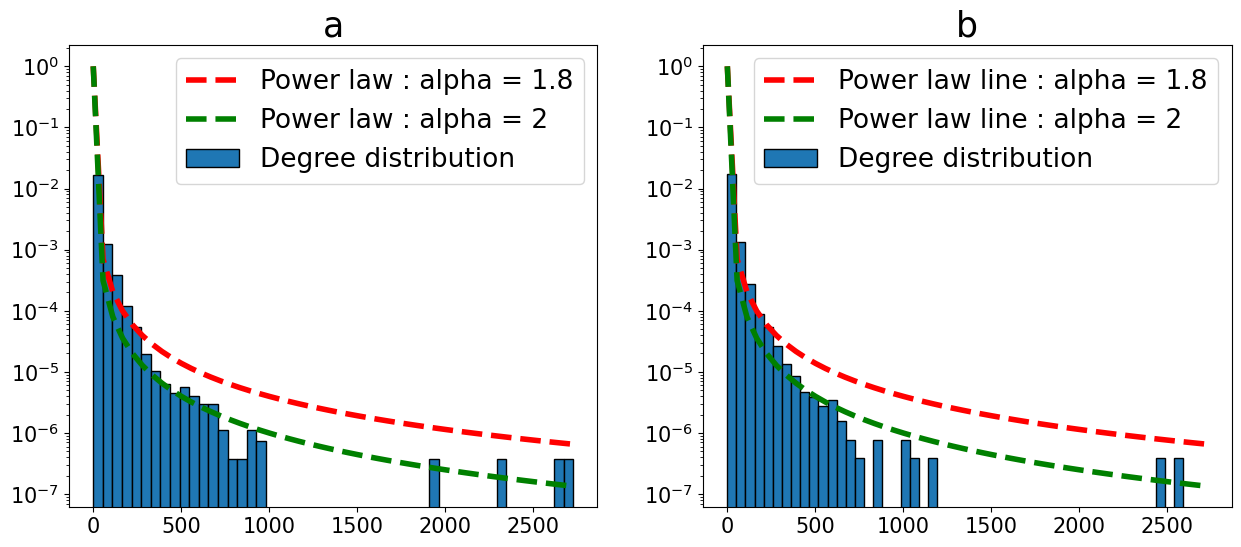

In [109]:
import numpy as np
import matplotlib.pyplot as plt

in_degree = [degree for node, degree in G.in_degree()]
out_degree = [degree for node, degree in G.out_degree()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_title('a', fontsize="25")
hist1, bins1, _ = ax1.hist(in_degree, edgecolor='black', bins=50, density=True)
ax1.set_yscale('log')

ax2.set_title('b', fontsize="25")
hist2, bins2, _ = ax2.hist(out_degree, edgecolor='black', bins=50, density=True)
ax2.set_yscale('log')

# Generate power law line data
max_value = max(max(in_degree), max(out_degree))
alpha_1 = 1.8
x = np.linspace(1, max_value, num=50)
y = x ** (-alpha_1)  # Power law distribution with alpha=2

# Generate second power law line data
alpha_2 = 2
x2 = np.linspace(1, max_value, num=50)
y2 = x2 ** (-alpha_2)  # Power law distribution with alpha=3

# Plot power law line with line width 2
ax1.plot(x, y, color='red', linestyle='--', linewidth=4)
ax2.plot(x, y, color='red', linestyle='--', linewidth=4)

# Plot second power law line
ax1.plot(x2, y2, color='green', linestyle='--',linewidth=4)
ax2.plot(x2, y2, color='green', linestyle='--',linewidth=4)


# show legend
# increase the size of the legend
ax1.legend([f'Power law : alpha = {alpha_1}', f'Power law : alpha = {alpha_2}', 'Degree distribution '], fontsize="19")
ax2.legend([f'Power law line : alpha = {alpha_1}', f'Power law line : alpha = {alpha_2}', 'Degree distribution '], fontsize="19")


# increase the font size of the ticks
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)


plt.show()

# save the figure as pdf
fig.savefig('../figures/degree_distribution.pdf', bbox_inches='tight')


In [16]:
# first and second moments of the in-degree distribution
print(f'First moment of the in-degree distribution: {np.mean(in_degree)}')
print(f'Second moment of the in-degree distribution: {np.mean(np.array(in_degree)**2)}')

# first and second moments of the out-degree distribution
print(f'First moment of the out-degree distribution: {np.mean(out_degree)}')
print(f'Second moment of the out-degree distribution: {np.mean(np.array(out_degree)**2)}')




First moment of the in-degree distribution: 22.105697318551247
Second moment of the in-degree distribution: 2636.909118547194
First moment of the out-degree distribution: 22.105697318551247
Second moment of the out-degree distribution: 2082.0338677314094


Recall that a network whose degree distribution follows a power law is a scale-fee network. As such, it has many small degree nodes, not so many around the average degree, and a few large degree nodes (hubs). 
Also the divergence of the second moment resambles exactly the behavior of the pwer law distribution, which is indeed said to be scale-free. 

Our distrbution seems to be at the boundary between anomalous and scale-free regime, but more likely to be scale-free (look at the first moment which is finite and second moment which is large). It's definitely not a random network (alpha >3).

In [110]:
# check the small world property
print(f'Average clustering coefficient: {nx.average_clustering(G)}')


Average clustering coefficient: 0.14409839447853506


In [107]:
import networkx as nx
import random

# Step 1: Get the largest connected component
largest_component = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_component)

# Step 2: Select a subset of landmark nodes
num_landmarks = 100  # Adjust the number of landmarks as needed
landmarks = random.sample(largest_component, num_landmarks)

# Step 3: Compute shortest paths from landmarks to all other nodes
shortest_paths = {}
for landmark in landmarks:
    shortest_paths[landmark] = nx.shortest_path_length(subgraph, source=landmark)

# Step 4: Estimate average shortest path length for each node
avg_shortest_path_lengths = {}
for node in subgraph.nodes:
    total_path_length = sum(shortest_paths[landmark].get(node, 0) for landmark in landmarks)
    avg_shortest_path_lengths[node] = total_path_length / num_landmarks

# Calculate the overall average shortest path length
approx_avg_shortest_path = sum(avg_shortest_path_lengths.values()) / len(avg_shortest_path_lengths)

print("Approximate average shortest path length in the largest connected component:", approx_avg_shortest_path)


/var/folders/qx/mbfp35d17jz5g1qfw4xsv3yc0000gn/T/ipykernel_77845/251472520.py:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  landmarks = random.sample(largest_component, num_landmarks)


Approximate average shortest path length in the largest connected component: 4.20939765047398


In [121]:
avg_deg = np.mean(in_degree)
# check the small world property    
np.log(51405)/np.log(avg_deg)

3.5038977909699716

### D. Node Clustering

The Barabasi-Albert model

This model generates scale-free graphs with a power-law degree distribution.

For the BA model, we have seen that $\langle k \rangle = 2m$ .

However the BA model creates undirected graphs. I may come back here later to create a special case of the BA model for directed graphs. Or simply simulate a BA graph mentioning the shortcomes of the model.

In [123]:
import networkx as nx
import random
from tqdm import tqdm

n = len(node_info)
m = int(np.round(np.mean([deg for _, deg in G.in_degree]) / 2))
print("m:", m)

def directed_barabasi_albert_graph(n, m):
    G = nx.DiGraph()
    G.add_node(0)

    targets = list(range(m))
    repeated_nodes = [0] * m

    for source in tqdm(range(1, n)):
        G.add_node(source)
        G.add_edges_from(zip(repeated_nodes, targets))
        G.add_edges_from(zip(targets, repeated_nodes))

        targets.append(source)
        # random choice with preferential attachment
        repeated_nodes.extend(random.choices(targets, k=m))

    return G


# generate a directed Barabasi-Albert graph
G_generated = directed_barabasi_albert_graph(n, m)

m: 11


100%|██████████| 51404/51404 [20:14<00:00, 42.32it/s] 


In [130]:
print(f'Is G generated directed? {nx.is_directed(G_generated)}')
print(f'Original G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')
print(f'Generated G has {G_generated.number_of_nodes()} nodes and {G_generated.number_of_edges()} edges')

Is G generated directed? True
Original G has 49339 nodes and 1090673 edges
Generated G has 51405 nodes and 102825 edges


In [134]:
# generate a normal Barabasi-Albert graph
G_generated_undirected = nx.barabasi_albert_graph(n, m)

print(f'Is G generated directed? {nx.is_directed(G_generated_undirected)}')
print(f'Original G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')
print(f'(Classically) Generated G has {G_generated_undirected.number_of_nodes()} nodes and {G_generated_undirected.number_of_edges()} edges')


Is G generated directed? False
Original G has 49339 nodes and 1090673 edges
(Classically) Generated G has 51405 nodes and 565334 edges


### C. Other Properties of the Graph

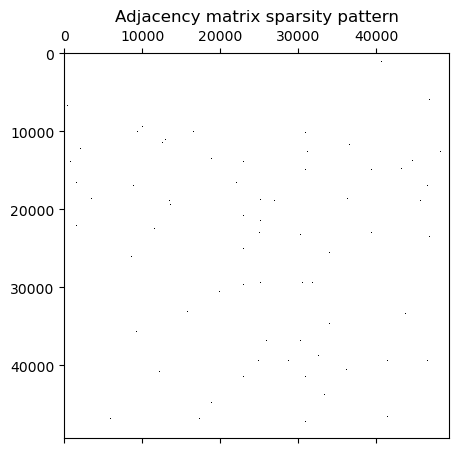

In [12]:
# sparsity of the graph
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Adjacency matrix sparsity pattern')
# use spy to visualize the sparsity pattern of the adjacency
ax.spy(adjacency_matrix);

In [23]:
# overall centrality measures

# clustering coefficient
clustering_coefficient = nx.clustering(G)

# eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# compute the average clustering coefficient
avg_clustering_coefficient = np.mean(list(clustering_coefficient.values()))

# compute the average eigenvector centrality
avg_eigenvector_centrality = np.mean(list(eigenvector_centrality.values()))

print(f'Average clustering coefficient: {avg_clustering_coefficient}')
print(f'Average eigenvector centrality: {avg_eigenvector_centrality}')

Average clustering coefficient: 0.14409839447853173
Average eigenvector centrality: 0.0010894835768673536


In [20]:
# now compute the global clustering coefficient
global_clustering_coefficient = nx.transitivity(G)
print(f'Global clustering coefficient: {global_clustering_coefficient}')

Global clustering coefficient: 0.055393233632308365


##### Spectral Analysis

A useful mathematical framework that reveals properties of the graph or network.

Recall that the spectrum tells us a lot about connectivity, bottlenecks, diameter, etc. On top of this, the first eigenvectors of the graph Laplacian are smooth functions (that can be used for clustering, ssee point D for this).


### D. Node Clustering

In [45]:
# load the spectral_embedding from the pkl file  ../data/embeddings/spectral_embedding.pkl
# we already computed the first 8 eigevector embeddings for all the 6 neuro transmitter types (look at the graph_prep notebook)

spectral_embedding = pd.read_pickle('../data/embeddings/spectral_embedding.pkl')

print('Spectral embedding shape:',spectral_embedding.shape)

spectral_embedding.head()


Spectral embedding shape: (51405, 48)


,spectral_ACH_0,spectral_ACH_1,spectral_ACH_2,spectral_ACH_3,spectral_ACH_4,spectral_ACH_5,spectral_ACH_6,spectral_ACH_7,spectral_SER_0,spectral_SER_1,...,spectral_DA_6,spectral_DA_7,spectral_OCT_0,spectral_OCT_1,spectral_OCT_2,spectral_OCT_3,spectral_OCT_4,spectral_OCT_5,spectral_OCT_6,spectral_OCT_7
720575940619238582,0.003841,-0.000205,0.000179,-0.000266,-2.730470e-15,-8.565195e-16,-1.991190e-16,4.646272e-16,-0.004184,-0.000167,...,0.000105,0.000088,-0.004382,0.000351,-0.000193,-0.000022,-0.000082,0.000115,-0.000057,0.000092
720575940634854554,0.011270,-0.000668,0.000612,-0.000809,-9.218381e-15,-2.605646e-15,-7.454237e-16,1.494312e-15,-0.004184,-0.000167,...,0.000113,0.000095,-0.004452,0.000360,-0.000199,-0.000024,-0.000085,0.000113,-0.000060,0.000096
720575940607923465,0.002681,-0.000128,0.000129,-0.000165,-1.789259e-15,-6.003157e-16,-1.130452e-16,3.054305e-16,-0.004184,-0.000167,...,0.000104,0.000087,-0.004382,0.000351,-0.000193,-0.000022,-0.000082,0.000115,-0.000057,0.000092
720575940630125562,0.006082,-0.000304,0.000294,-0.000374,-3.994143e-15,-1.274669e-15,-2.766731e-16,6.797471e-16,-0.004184,-0.000167,...,0.000104,0.000087,-0.004382,0.000351,-0.000193,-0.000022,-0.000082,0.000115,-0.000057,0.000092
720575940627841795,0.009046,-0.000378,0.000456,-0.000600,-6.726305e-15,-2.289124e-15,-4.042979e-16,1.159410e-15,-0.004184,-0.000167,...,0.000163,0.000150,-0.004382,0.000351,-0.000193,-0.000022,-0.000082,0.000115,-0.000057,0.000092


In [46]:
node2vec_embedding = pd.read_pickle('../data/embeddings/node2vec_embedding.pkl')

print('Node2vec embedding shape:',node2vec_embedding.shape)

node2vec_embedding.head()

Node2vec embedding shape: (51405, 48)


,ACH_0,ACH_1,ACH_2,ACH_3,ACH_4,ACH_5,ACH_6,ACH_7,SER_0,SER_1,...,DA_6,DA_7,OCT_0,OCT_1,OCT_2,OCT_3,OCT_4,OCT_5,OCT_6,OCT_7
720575940621280688,-2.191900,0.049500,-0.072872,2.529746,-0.076199,-0.797629,0.910458,2.138495,0.024376,0.049488,...,2.257592,-1.052635,-0.086376,-0.016342,-0.075253,0.132493,0.043961,-0.032677,0.089628,0.128388
720575940629174889,-1.859022,1.641020,0.985564,2.125586,-0.007060,1.693392,-0.502335,0.876726,0.076958,-1.087816,...,1.963795,-0.368879,0.061196,0.024918,0.113039,0.013703,0.092897,-0.082858,-0.096461,-0.012831
720575940637132389,-1.602327,0.615010,0.530065,1.076127,-0.032424,2.005130,-0.967994,0.755368,0.100470,-0.249987,...,1.295472,-1.272117,0.060951,0.014239,-0.058449,-0.046567,-0.092479,0.090280,0.040239,-0.106398
720575940654777505,-6.589922,-6.693934,2.004244,0.055977,-4.032084,3.622172,8.605543,3.299473,-0.115199,0.002871,...,0.115346,-0.042695,0.112006,0.021041,0.086480,0.051845,-0.034308,-0.000330,-0.061942,0.119736
720575940616159371,-6.747396,-7.012646,2.138878,0.055543,-4.097299,3.801588,8.909692,3.433254,-0.042529,0.076106,...,-0.012369,-0.027677,0.123636,0.086710,0.055061,0.047037,-0.039150,-0.109720,-0.061458,-0.098871


T-SNE map using node spectral and/or node2vec features

In [81]:
# select first 24 columns of spectral embedding
spectral_embedding_24 = spectral_embedding.iloc[:, :24]

# lets now create a T-SNE map using node spectral embeddings
import seaborn as sns
from sklearn.manifold import TSNE

# create a TSNE object
tsne = TSNE(perplexity = 50, n_components=2, random_state=23, learning_rate = 'auto')

tsne_features = tsne.fit_transform(spectral_embedding_24)

tsne_df = pd.DataFrame(np.hstack((tsne_features, node_info[['super_class', 'class', 'hemilineage']])), columns=['x', 'y', 'super_class', 'class', 'hemilineage'])





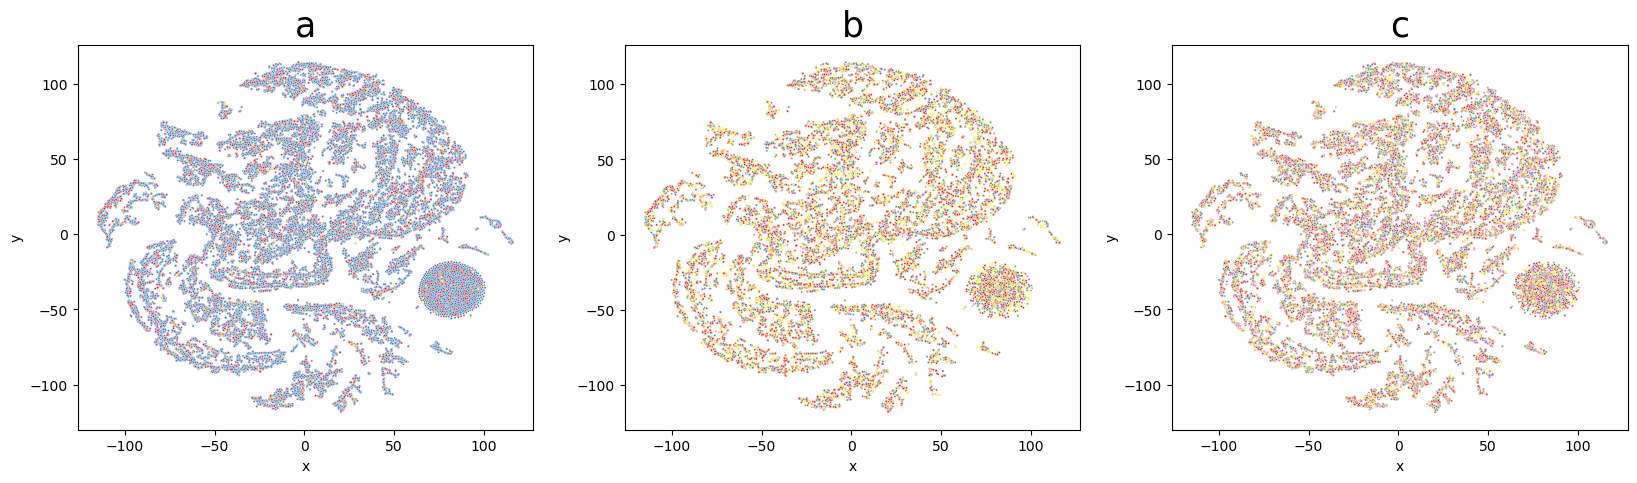

In [101]:
# lets now plot the T-SNE map

# size of the dot smaller

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.set_title('a', fontsize="25")
sns.scatterplot(x='x', y='y', hue='super_class', data=tsne_df, palette='Set1', ax=ax1,  s=9, marker = '.', legend=False)


ax2.set_title('b', fontsize="25")
sns.scatterplot(x='x', y='y', hue='class', data=tsne_df, palette='Set1', ax=ax2, legend=False, s=9, marker = '.')

# hemilineage without legend 
ax3.set_title('c', fontsize="25")
sns.scatterplot(x='x', y='y', hue='hemilineage', data=tsne_df, palette='Set1', ax=ax3, legend=False, s=9, marker = '.')

#save the figure as pdf
fig.savefig('../figures/tsne_spectral_embedding.pdf', bbox_inches='tight')

In [94]:
# select first 24 columns of the node2vec embedding
node2vec_embedding_24 = node2vec_embedding.iloc[:, :24]

<Axes: title={'center': 'c'}, xlabel='x', ylabel='y'>

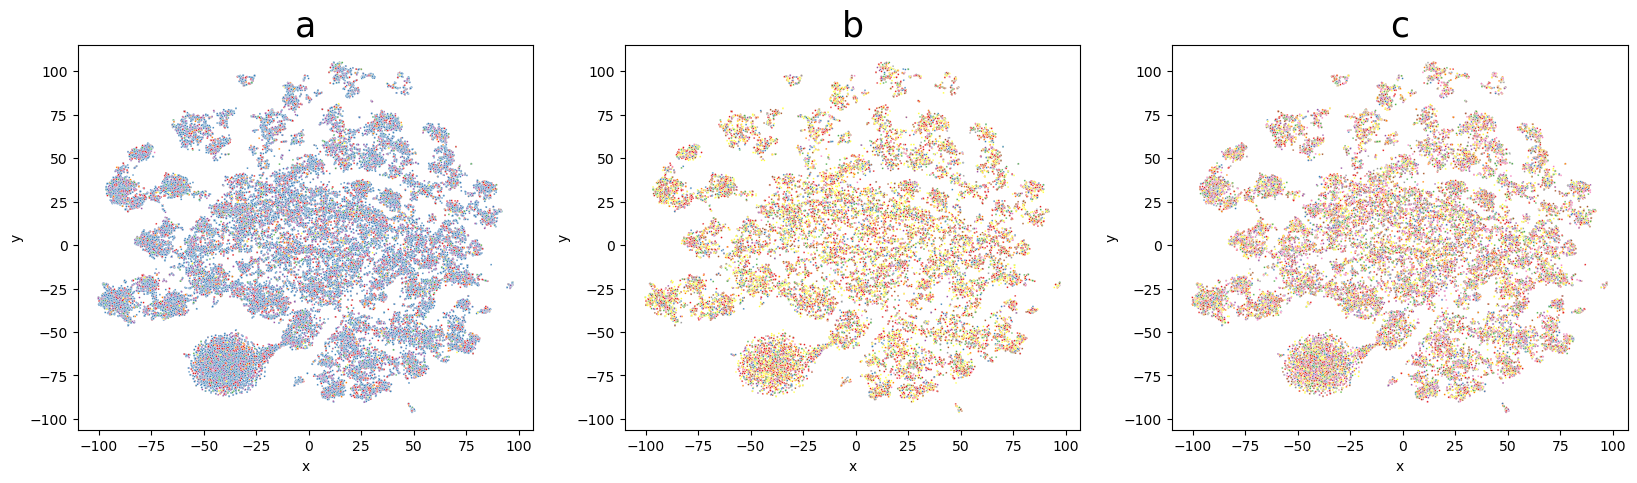

In [102]:
# lets now create a T-SNE map using node2vec embeddings
# create a TSNE object

tsne_features2 = tsne.fit_transform(node2vec_embedding_24)

tsne_df2 = pd.DataFrame(np.hstack((tsne_features2, node_info[['super_class', 'class', 'hemilineage']])), columns=['x', 'y', 'super_class', 'class', 'hemilineage'])

# lets now plot the T-SNE map

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.set_title('a', fontsize="25")
sns.scatterplot(x='x', y='y', hue='super_class', data=tsne_df2, palette='Set1', ax=ax1, s=7, marker = '.', legend=False)


ax2.set_title('b', fontsize="25")
sns.scatterplot(x='x', y='y', hue='class', data=tsne_df2, palette='Set1', ax=ax2, legend=False, s=7, marker = '.')

# hemilineage without legend 
ax3.set_title('c', fontsize="25")
sns.scatterplot(x='x', y='y', hue='hemilineage', data=tsne_df2, palette='Set1', ax=ax3, legend=False, s=7, marker = '.')